<a href="https://colab.research.google.com/github/Azharsayyed5/heart-disease-prediction/blob/main/heartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
# Import packages that we will be working with.
import os
import numpy as np
import pandas as pd
from keras.layers import Dense
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

print(os.listdir("../content"))
np.random.seed(10)

['.config', 'heart.csv', 'sample_data']


In [41]:
# Load the dataset, and view couple of the first rows.
data = pd.read_csv("../content/heart.csv")
print(data.head(3))

# Check the datatypes
print(data.dtypes)

   age  sex  cp  trestbps  chol  fbs  ...  exang  oldpeak  slope  ca  thal  target
0   63    1   3       145   233    1  ...      0      2.3      0   0     1       1
1   37    1   2       130   250    0  ...      0      3.5      0   0     2       1
2   41    0   1       130   204    0  ...      0      1.4      2   0     2       1

[3 rows x 14 columns]
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object


In [42]:
# At this moment we have a dataframe that contains all of the heart.csv data. However we need to
# Separate them to [X, Y]. Where our target labels are 'Y', and 'X' is our training data.
Y = data.target.values
X = data.drop(['target'], axis=1)

# Now split to train/test with 80% training data, and 20% test data.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Check dimensions of both sets.
print("Train Features Size:", X_train.shape)
print("Test Features Size:", X_test.shape)
print("Train Labels Size:", Y_train.shape)
print("Test Labels Size:", Y_test.shape)

Train Features Size: (242, 13)
Test Features Size: (61, 13)
Train Labels Size: (242,)
Test Labels Size: (61,)


In [43]:
# Define a Neural Network Model

def NN_model(learning_rate):
    model = Sequential()
    model.add(Dense(32, input_dim=13, kernel_initializer='normal', activation='relu'))
    model.add(Dense(16, kernel_initializer='normal', activation='relu'))
    model.add(Dense(2, activation='softmax'))
    Adam(lr=learning_rate)
    model.compile(loss='sparse_categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [44]:
# Build a NN-model, and start training
learning_rate = 0.01
model = NN_model(learning_rate)
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 34        
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________
None


In [45]:
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=16, verbose=2)

Epoch 1/100
16/16 - 1s - loss: 0.8344 - accuracy: 0.5041 - val_loss: 0.7303 - val_accuracy: 0.4262
Epoch 2/100
16/16 - 0s - loss: 0.6958 - accuracy: 0.5289 - val_loss: 0.6780 - val_accuracy: 0.5738
Epoch 3/100
16/16 - 0s - loss: 0.6772 - accuracy: 0.5992 - val_loss: 0.6258 - val_accuracy: 0.6557
Epoch 4/100
16/16 - 0s - loss: 0.6816 - accuracy: 0.5950 - val_loss: 0.5869 - val_accuracy: 0.7541
Epoch 5/100
16/16 - 0s - loss: 0.6131 - accuracy: 0.6901 - val_loss: 0.5595 - val_accuracy: 0.7705
Epoch 6/100
16/16 - 0s - loss: 0.6305 - accuracy: 0.6198 - val_loss: 0.5809 - val_accuracy: 0.6557
Epoch 7/100
16/16 - 0s - loss: 0.6144 - accuracy: 0.6570 - val_loss: 0.5727 - val_accuracy: 0.6557
Epoch 8/100
16/16 - 0s - loss: 0.6132 - accuracy: 0.6612 - val_loss: 0.5229 - val_accuracy: 0.8033
Epoch 9/100
16/16 - 0s - loss: 0.6008 - accuracy: 0.6777 - val_loss: 0.5070 - val_accuracy: 0.8033
Epoch 10/100
16/16 - 0s - loss: 0.5668 - accuracy: 0.7066 - val_loss: 0.5112 - val_accuracy: 0.8033
Epoch 11/

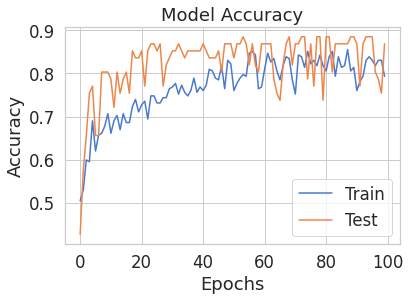

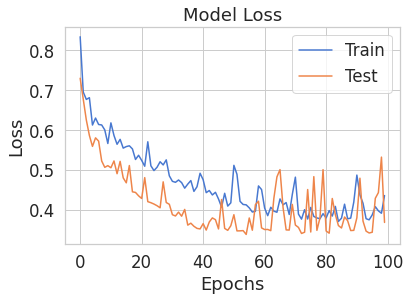

In [53]:
# Plot the model accuracy vs. number of Epochs
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

# Plot the Loss function vs. number of Epochs
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['Train', 'Test'])
plt.show()

In [54]:
predictions = np.argmax(model.predict(X_test), axis=1)
model_accuracy = accuracy_score(Y_test, predictions)*100
print("Model Accracy:", model_accuracy,"%")
print(classification_report(Y_test, predictions))

Model Accracy: 86.88524590163934 %
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



In [55]:
model.save('heartPredictionModel')

INFO:tensorflow:Assets written to: heartPredictionModel/assets


In [57]:
new_model = tf.keras.models.load_model('heartPredictionModel')

# Check its architecture
new_model.summary()
# Run validation
predictions = np.argmax(new_model.predict(X_test), axis=1)
model_accuracy = accuracy_score(Y_test, predictions)*100
print("Model Accracy:", model_accuracy,"%")
print(classification_report(Y_test, predictions))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 32)                448       
_________________________________________________________________
dense_4 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_5 (Dense)              (None, 2)                 34        
Total params: 1,010
Trainable params: 1,010
Non-trainable params: 0
_________________________________________________________________
Model Accracy: 86.88524590163934 %
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        29
           1       0.88      0.88      0.88        32

    accuracy                           0.87        61
   macro avg       0.87      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61

